# Netflix Movies and TV Shows Analysis 🍿

This project analyzes Netflix's movie and TV show catalog using data from Kaggle.

---

# **Import Libraries 📂**
----

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
from scipy.stats import zscore
from collections import Counter

# **Load Dataset 📥**

---

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahadadel","key":"2df9bffb703a495078df78ade6084be8"}'}

In [4]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d OctopusTeam/Full-Netflix-Dataset

Dataset URL: https://www.kaggle.com/datasets/OctopusTeam/Full-Netflix-Dataset
License(s): CC0-1.0
  0% 0.00/509k [00:00<?, ?B/s]
100% 509k/509k [00:00<00:00, 816MB/s]


In [6]:
!unzip Full-Netflix-Dataset.zip

Archive:  Full-Netflix-Dataset.zip
  inflating: data.csv                


In [7]:
df = pd.read_csv('data.csv')

In [8]:
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,9171.0,NaN
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986.0,tt0092149,7.4,8004.0,NaN
2,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2378710.0,NaN
3,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1248782.0,NaN
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,527218.0,NaN
...,...,...,...,...,...,...,...,...
21782,NaN,tv,NaN,2023.0,NaN,NaN,NaN,NaN
21783,Happy Crush,tv,"Comedy, Romance",2025.0,tt36587037,8.8,12.0,NaN
21784,NaN,tv,NaN,2015.0,NaN,NaN,NaN,NaN
21785,NaN,tv,NaN,2009.0,NaN,NaN,NaN,NaN


# **Understand the data 👩‍💻**

---

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21787 entries, 0 to 21786
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               21055 non-null  object 
 1   type                21787 non-null  object 
 2   genres              21414 non-null  object 
 3   releaseYear         21747 non-null  float64
 4   imdbId              20145 non-null  object 
 5   imdbAverageRating   19961 non-null  float64
 6   imdbNumVotes        19961 non-null  float64
 7   availableCountries  159 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [10]:
df.isnull().sum()

,0
title,732
type,0
genres,373
releaseYear,40
imdbId,1642
imdbAverageRating,1826
imdbNumVotes,1826
availableCountries,21628


In [12]:
df.columns

Index(['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating',
       'imdbNumVotes', 'availableCountries'],
      dtype='object')

# **Data Cleaning 🧽**

---

Since, I cannot know the tile or tyoe I will drop them.

In [13]:
df.dropna(subset=['title', 'type'], inplace=True)

In [14]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [15]:
df['releaseyear'] = df['releaseyear'].astype('Int64')

In [16]:
df['genre_list'] = df['genres'].dropna().apply(lambda x: x.split(', '))

In [17]:
df.drop(columns=['availablecountries'], inplace=True)

In [18]:
df.head(10)

,title,type,genres,releaseyear,imdbid,imdbaveragerating,imdbnumvotes,genre_list
0,Ariel,movie,"Comedy, Crime, Romance",1988,tt0094675,7.4,9171.0,"[Comedy, Crime, Romance]"
1,Shadows in Paradise,movie,"Comedy, Drama, Music",1986,tt0092149,7.4,8004.0,"[Comedy, Drama, Music]"
2,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2378710.0,"[Drama, Romance]"
3,American Beauty,movie,Drama,1999,tt0169547,8.3,1248782.0,[Drama]
4,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,tt0119116,7.6,527218.0,"[Action, Adventure, Sci-Fi]"
5,Jarhead,movie,"Biography, Drama, War",2005,tt0418763,7.0,215652.0,"[Biography, Drama, War]"
6,Unforgiven,movie,"Drama, Western",1992,tt0105695,8.2,454409.0,"[Drama, Western]"
7,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,tt0338013,8.3,1136321.0,"[Drama, Romance, Sci-Fi]"
8,Amores Perros,movie,"Drama, Thriller",2000,tt0245712,8.0,267807.0,"[Drama, Thriller]"
9,A History of Violence,movie,"Action, Crime, Drama",2005,tt0399146,7.4,264450.0,"[Action, Crime, Drama]"


In [19]:
df['imdbnumvotes'] = df['imdbnumvotes'].fillna(0)

In [20]:
df.reset_index(drop=True, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21055 entries, 0 to 21054
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              21055 non-null  object 
 1   type               21055 non-null  object 
 2   genres             20883 non-null  object 
 3   releaseyear        21052 non-null  Int64  
 4   imdbid             20145 non-null  object 
 5   imdbaveragerating  19961 non-null  float64
 6   imdbnumvotes       21055 non-null  float64
 7   genre_list         20883 non-null  object 
dtypes: Int64(1), float64(2), object(5)
memory usage: 1.3+ MB


In [22]:
df.isnull().sum()

,0
title,0
type,0
genres,172
releaseyear,3
imdbid,910
imdbaveragerating,1094
imdbnumvotes,0
genre_list,172


In [24]:
df = df.dropna(subset=['releaseyear'])

In [25]:
df['imdbaveragerating'] = df['imdbaveragerating'].fillna(-1)

<ipython-input-25-d3182f5f9f86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['imdbaveragerating'] = df['imdbaveragerating'].fillna(-1)


In [26]:
df.isnull().sum()

,0
title,0
type,0
genres,170
releaseyear,0
imdbid,908
imdbaveragerating,0
imdbnumvotes,0
genre_list,170


# **Exploratory Data Analysis 🧐**

---

In [ ]:
df['decade'] = (df['releaseyear'] // 10) * 10

In [31]:
movie_count_by_decade = df.groupby('decade').size().reset_index(name='movie_count')

In [32]:
movie_count_by_decade

,decade,movie_count
0,1910,5
1,1920,14
2,1930,44
3,1940,84
4,1950,256
5,1960,249
6,1970,322
7,1980,488
8,1990,800
9,2000,2387


In [38]:
palette = ["#F72585", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0"]

<ipython-input-39-b95bd97e8dad>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=movie_count_by_decade, x='decade', y='movie_count', palette= palette)
<ipython-input-39-b95bd97e8dad>:2: UserWarning: 
The palette list has fewer values (5) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=movie_count_by_decade, x='decade', y='movie_count', palette= palette)


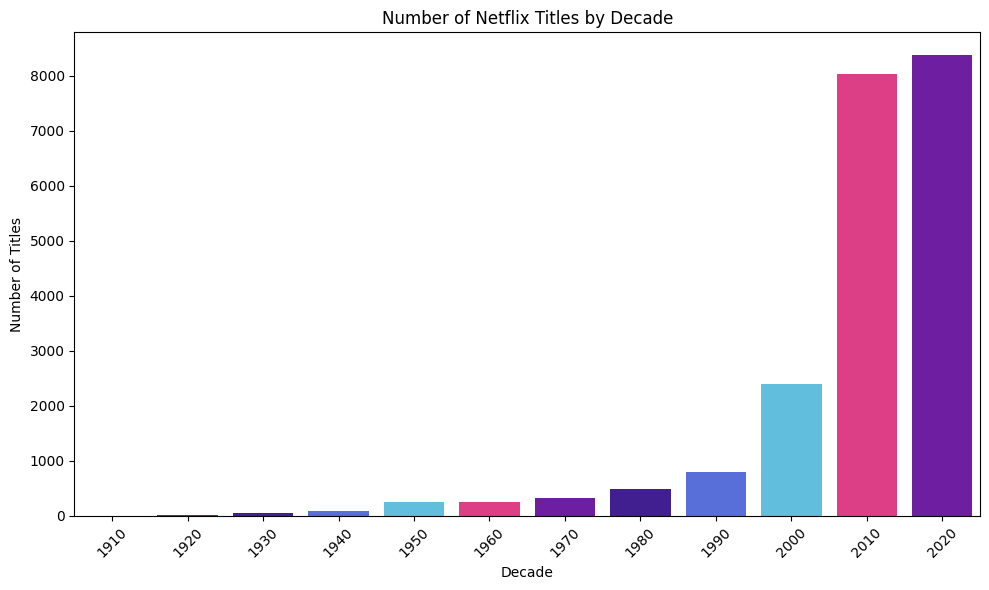

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data=movie_count_by_decade, x='decade', y='movie_count', palette= palette)
plt.title('Number of Netflix Titles by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-41-f21435f63807>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette= palette)
<ipython-input-41-f21435f63807>:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=df, x='type', palette= palette)


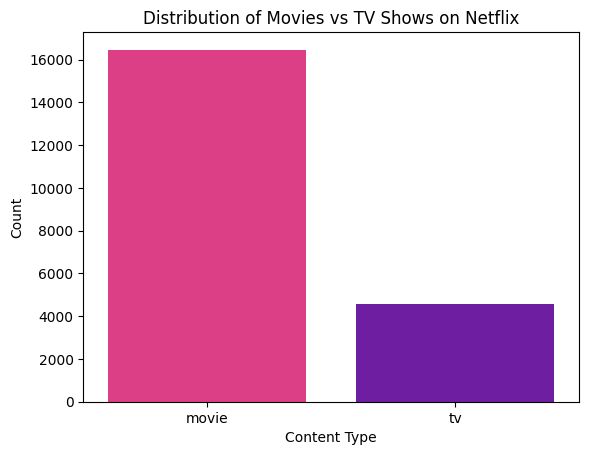

In [41]:
sns.countplot(data=df, x='type', palette= palette)
plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

In [43]:
genre_counts = Counter([genre for sublist in df['genre_list'].dropna() for genre in sublist])
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['genre', 'count'])

<ipython-input-45-12a9756ce14a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='count', y='genre', palette= palette)
<ipython-input-45-12a9756ce14a>:1: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_genres, x='count', y='genre', palette= palette)


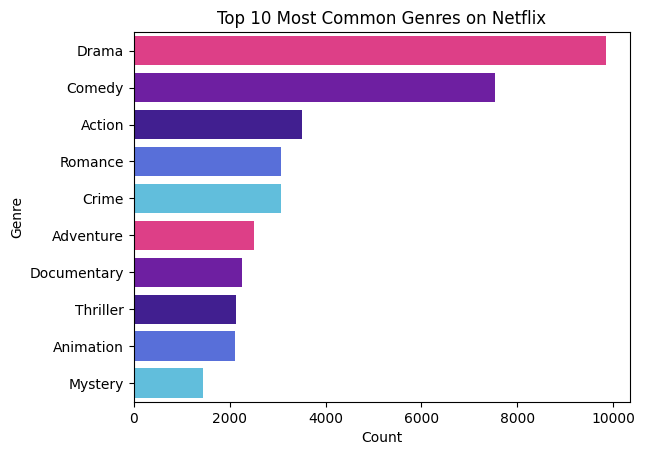

In [45]:
sns.barplot(data=top_genres, x='count', y='genre', palette= palette)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [48]:
valid_ratings = df[df['imdbaveragerating'] > 0]

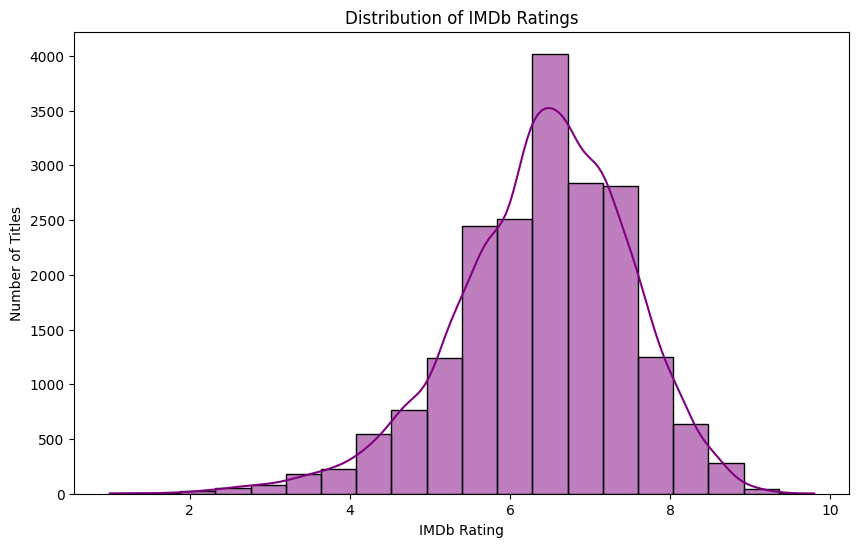

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(valid_ratings['imdbaveragerating'], bins=20, kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Number of Titles')
plt.show()

In [51]:
top_rated = df[df['imdbaveragerating'] >= 9.0][['title', 'type', 'imdbaveragerating']].sort_values(by='imdbaveragerating', ascending=False)

In [69]:
top_rated.head(100)

,title,type,imdbaveragerating
16375,Mysterious murder,movie,9.8
16493,Breaking Bad,tv,9.5
16562,Band of Brothers,tv,9.4
18907,Flavours of Romania,tv,9.4
13525,Ayaanle,movie,9.4
81,The Shawshank Redemption,movie,9.3
20856,"CinLock: Love, Camera, Action!",tv,9.3
16467,Avatar: The Last Airbender,tv,9.3
16436,One Piece Fan Letter,movie,9.2
16414,One Piece Fan Letter,movie,9.2


from matplotlib import pyplot as plt
_df_0['imdbaveragerating'].plot(kind='hist', bins=20, title='imdbaveragerating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['imdbaveragerating'].plot(kind='line', figsize=(8, 4), title='imdbaveragerating')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='imdbaveragerating', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-70-7cf547a516df>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




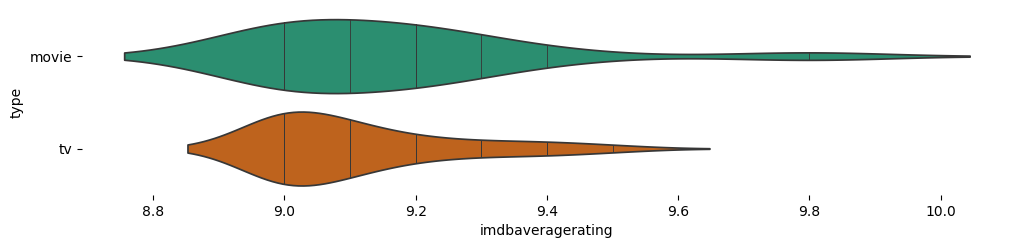

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='imdbaveragerating', y='type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [53]:
exploded_df = df.explode('genre_list')
filtered = exploded_df[exploded_df['imdbaveragerating'] > 0]

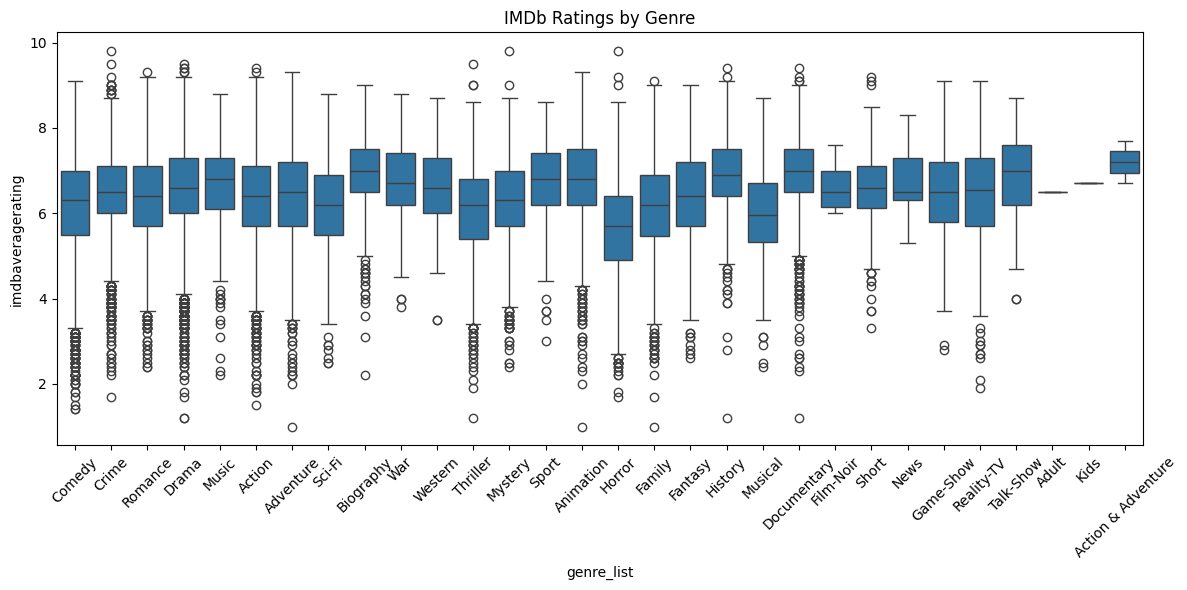

In [55]:
plt.figure(figsize=(12,6))
# Reset the index after exploding and filtering to ensure a unique index
filtered = exploded_df[exploded_df['imdbaveragerating'] > 0].reset_index(drop=True)
sns.boxplot(data=filtered, x='genre_list', y='imdbaveragerating')
plt.title('IMDb Ratings by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
df['main_genre'] = df['genre_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

<ipython-input-57-8c0c1c4d6972>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['main_genre'] = df['genre_list'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [58]:
genre_discrepancy = (
    df[df['main_genre'].notnull() & (df['imdbaveragerating'] > 0)]
    .groupby('main_genre')[['imdbaveragerating', 'imdbnumvotes']]
    .mean()
    .reset_index()
    .rename(columns={
        'imdbaveragerating': 'imdb_rating',
        'imdbnumvotes': 'imdb_votes'
    })
)

In [59]:
genre_discrepancy['votes_z'] = zscore(genre_discrepancy['imdb_votes'])
genre_discrepancy['rating_z'] = zscore(genre_discrepancy['imdb_rating'])

In [60]:
def classify_quadrant(row):
    if row['votes_z'] >= 0 and row['rating_z'] >= 0:
        return "🎯 High Popularity & High Rating"
    elif row['votes_z'] >= 0 and row['rating_z'] < 0:
        return "🔥 Popular but Lower Rated"
    elif row['votes_z'] < 0 and row['rating_z'] >= 0:
        return "💎 Underrated High Quality"
    else:
        return "🧊 Low Popularity & Low Rating"

In [61]:
genre_discrepancy['quadrant'] = genre_discrepancy.apply(classify_quadrant, axis=1)

In [62]:
fig = px.scatter(
    genre_discrepancy,
    x='votes_z',
    y='rating_z',
    text='main_genre',
    color='quadrant',
    title='🎬 Genre Discrepancy: Popularity vs Quality (Z-Score)',
    labels={
        'votes_z': 'Popularity (IMDb Votes - z-score)',
        'rating_z': 'Quality (IMDb Rating - z-score)'
    },
    color_discrete_map={
        "🎯 High Popularity & High Rating": "green",
        "🔥 Popular but Lower Rated": "yellow",
        "💎 Underrated High Quality": "blue",
        "🧊 Low Popularity & Low Rating": "red"
    }
)

In [66]:
fig.add_shape(type='line', x0=0, x1=0,
              y0=genre_discrepancy['rating_z'].min(), y1=genre_discrepancy['rating_z'].max(),
              line=dict(color='black', dash='dash'))

fig.add_shape(type='line', y0=0, y1=0,
              x0=genre_discrepancy['votes_z'].min(), x1=genre_discrepancy['votes_z'].max(),
              line=dict(color='black', dash='dash'))

fig.update_traces(textposition='top center', marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(height=700, width=1600)
fig.show()


In [71]:
df.to_csv("CleanData.csv", index=False)